<a href="https://colab.research.google.com/github/ericlim27/auction-/blob/main/Pairs_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "GS", "JPM", "AMD", "GME", "SPY","CL","NG", "NFLX", "KO","PEP","BA", "WMT","GS","CVX","XOM"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,DPZ,AAPL,GOOG,GS,JPM,AMD,GME,SPY,CL,NG,NFLX,KO,PEP,BA,WMT,GS,CVX,XOM
Date,,,,,,,,,,,,,,,,,,
2021-10-20,447.363007,147.552933,142.414993,386.321228,160.818985,116.389999,46.130001,438.759125,71.949326,7.64,625.140015,51.447990,152.854034,216.169998,141.536957,386.321289,104.984459,59.134464
2021-10-21,456.513580,147.770416,142.780502,386.037109,159.557602,119.330002,45.427502,439.903503,71.748131,7.68,653.159973,51.184292,150.835693,214.339996,142.322205,386.037140,103.667046,58.060131
2021-10-22,452.972351,146.989456,138.625000,392.411224,161.703857,119.820000,42.450001,439.447723,72.332535,7.64,664.780029,51.278481,151.584305,212.970001,143.805420,392.411255,104.650467,58.458382
2021-10-25,454.835602,146.940018,138.772995,392.818512,160.913147,122.360001,43.492500,441.804352,71.987640,7.81,671.659973,51.071285,150.873611,212.869995,145.472839,392.818481,105.624603,59.597538
2021-10-26,454.386902,147.612228,139.671997,395.527313,161.346115,122.930000,44.459999,442.202026,72.964851,7.76,668.520020,51.297306,152.721375,209.809998,144.202911,395.527252,105.856537,60.977501


In [ ]:
corr_matrix = d.corr()
corr_matrix

,DPZ,AAPL,GOOG,GS,JPM,AMD,GME,SPY,CL,NG,NFLX,KO,PEP,BA,WMT,GS,CVX,XOM
DPZ,1.000000,0.818148,0.874797,0.724772,0.546339,0.665388,0.469130,0.834557,-0.008003,-0.729848,0.372663,0.835513,0.905812,0.080836,0.407599,0.724772,0.376568,0.497005
AAPL,0.818148,1.000000,0.817185,0.729216,0.583197,0.788684,0.430274,0.832325,-0.247869,-0.812816,0.659198,0.627387,0.799800,0.095350,0.373090,0.729216,0.374951,0.498231
GOOG,0.874797,0.817185,1.000000,0.933673,0.839678,0.572945,0.717871,0.978253,-0.275693,-0.826137,0.542024,0.803798,0.822937,0.332867,0.120376,0.933673,0.697187,0.794650
GS,0.724772,0.729216,0.933673,1.000000,0.958376,0.447324,0.803210,0.964367,-0.341963,-0.780165,0.480084,0.719830,0.687478,0.510482,-0.044592,1.000000,0.842364,0.914136
JPM,0.546339,0.583197,0.839678,0.958376,1.000000,0.298410,0.799670,0.891535,-0.364154,-0.668993,0.468383,0.614595,0.553803,0.616803,-0.185743,0.958376,0.923564,0.955293
AMD,0.665388,0.788684,0.572945,0.447324,0.298410,1.000000,0.076881,0.555607,-0.303712,-0.676455,0.697511,0.429680,0.708202,-0.128145,0.555587,0.447324,0.138389,0.182714
GME,0.469130,0.430274,0.717871,0.803210,0.799670,0.076881,1.000000,0.737520,-0.299217,-0.545123,0.240664,0.525555,0.418135,0.562551,-0.303935,0.803210,0.768077,0.823951
SPY,0.834557,0.832325,0.978253,0.964367,0.891535,0.555607,0.737520,1.000000,-0.239733,-0.797621,0.532301,0.809572,0.817098,0.442483,0.118445,0.964367,0.764266,0.844584
CL,-0.008003,-0.247869,-0.275693,-0.341963,-0.364154,-0.303712,-0.299217,-0.239733,1.000000,0.552902,-0.599506,0.217796,0.070355,0.020757,0.390484,-0.341963,-0.272379,-0.315060
NG,-0.729848,-0.812816,-0.826137,-0.780165,-0.668993,-0.676455,-0.545123,-0.797621,0.552902,1.000000,-0.644214,-0.521078,-0.650827,-0.165316,-0.042714,-0.780165,-0.523308,-0.621430


<Axes: >

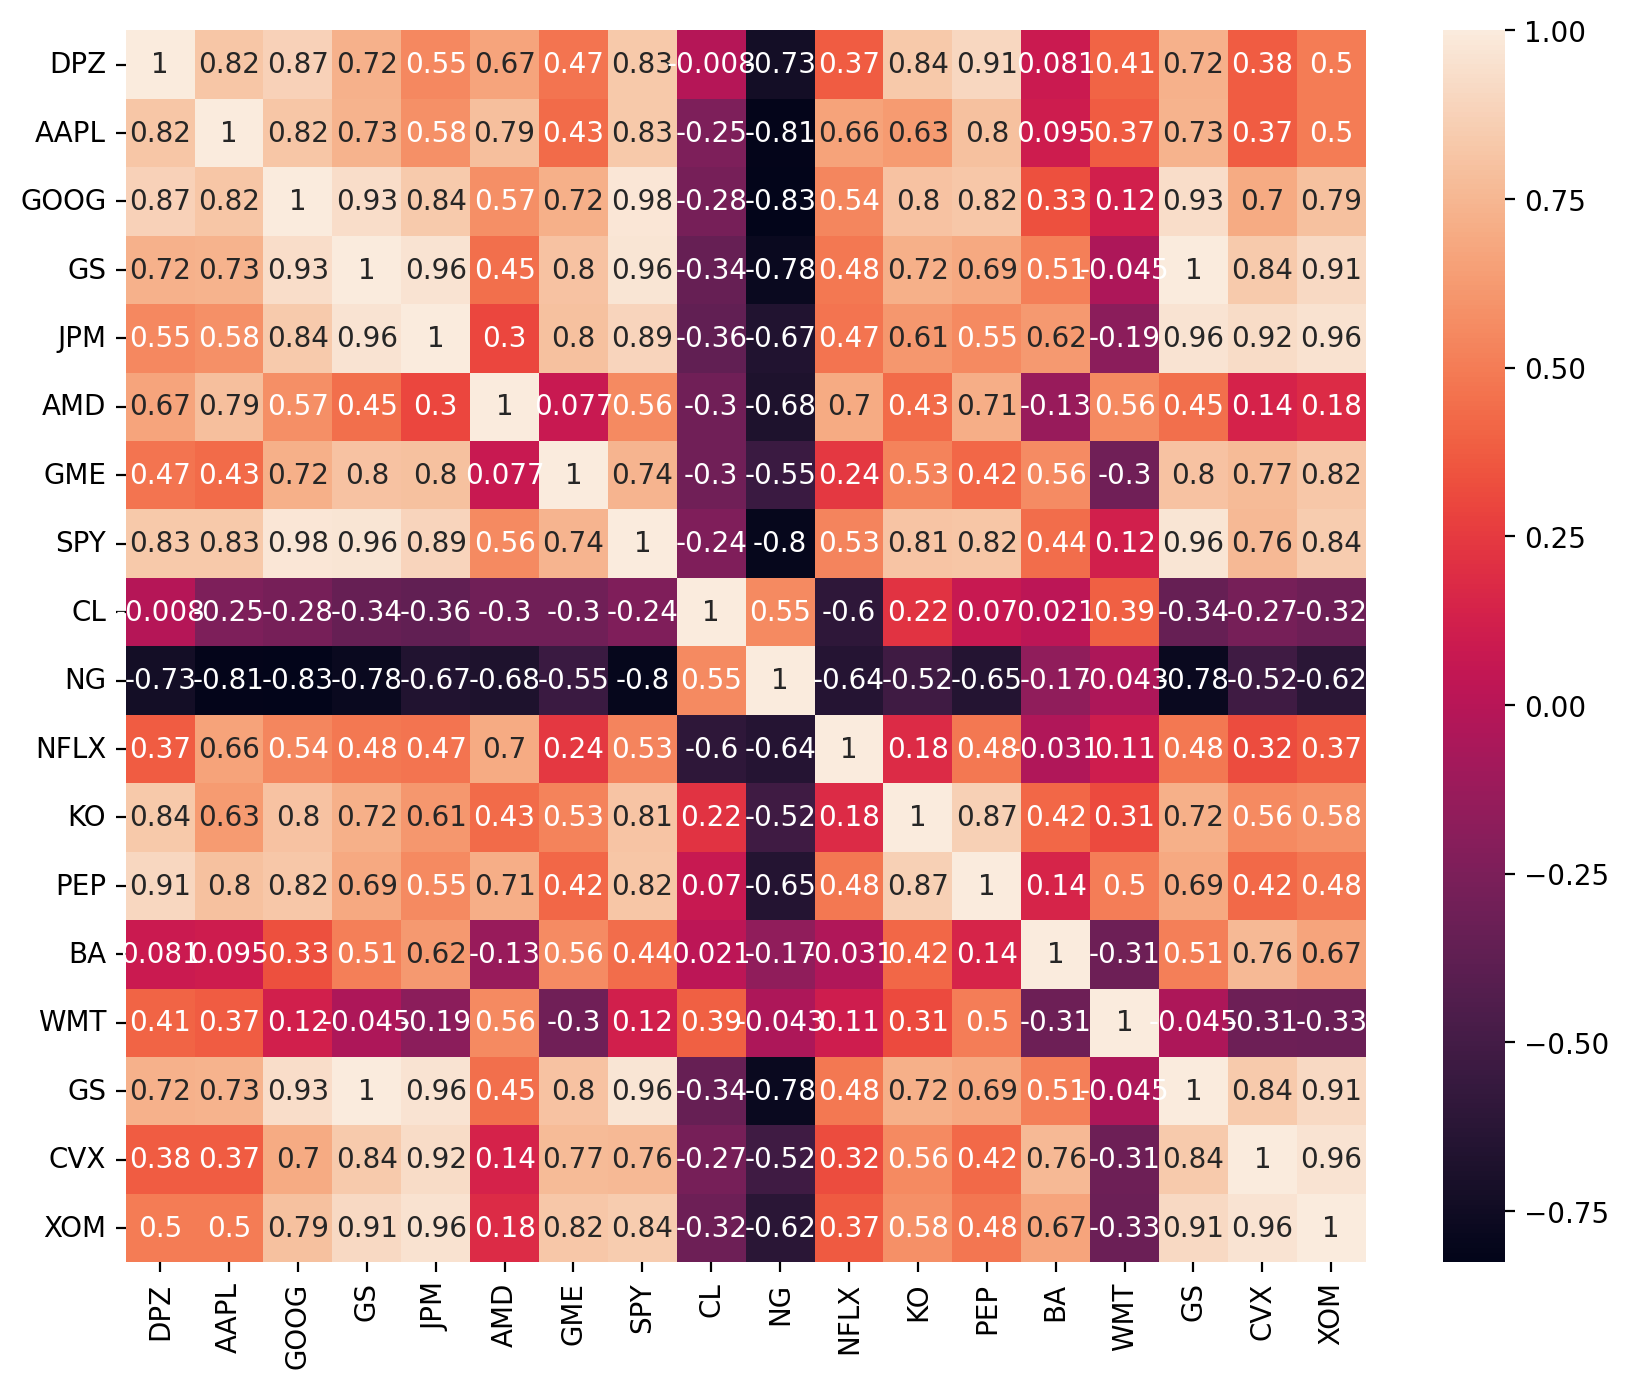

In [ ]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=200)
sn.heatmap(corr_matrix, annot = True)

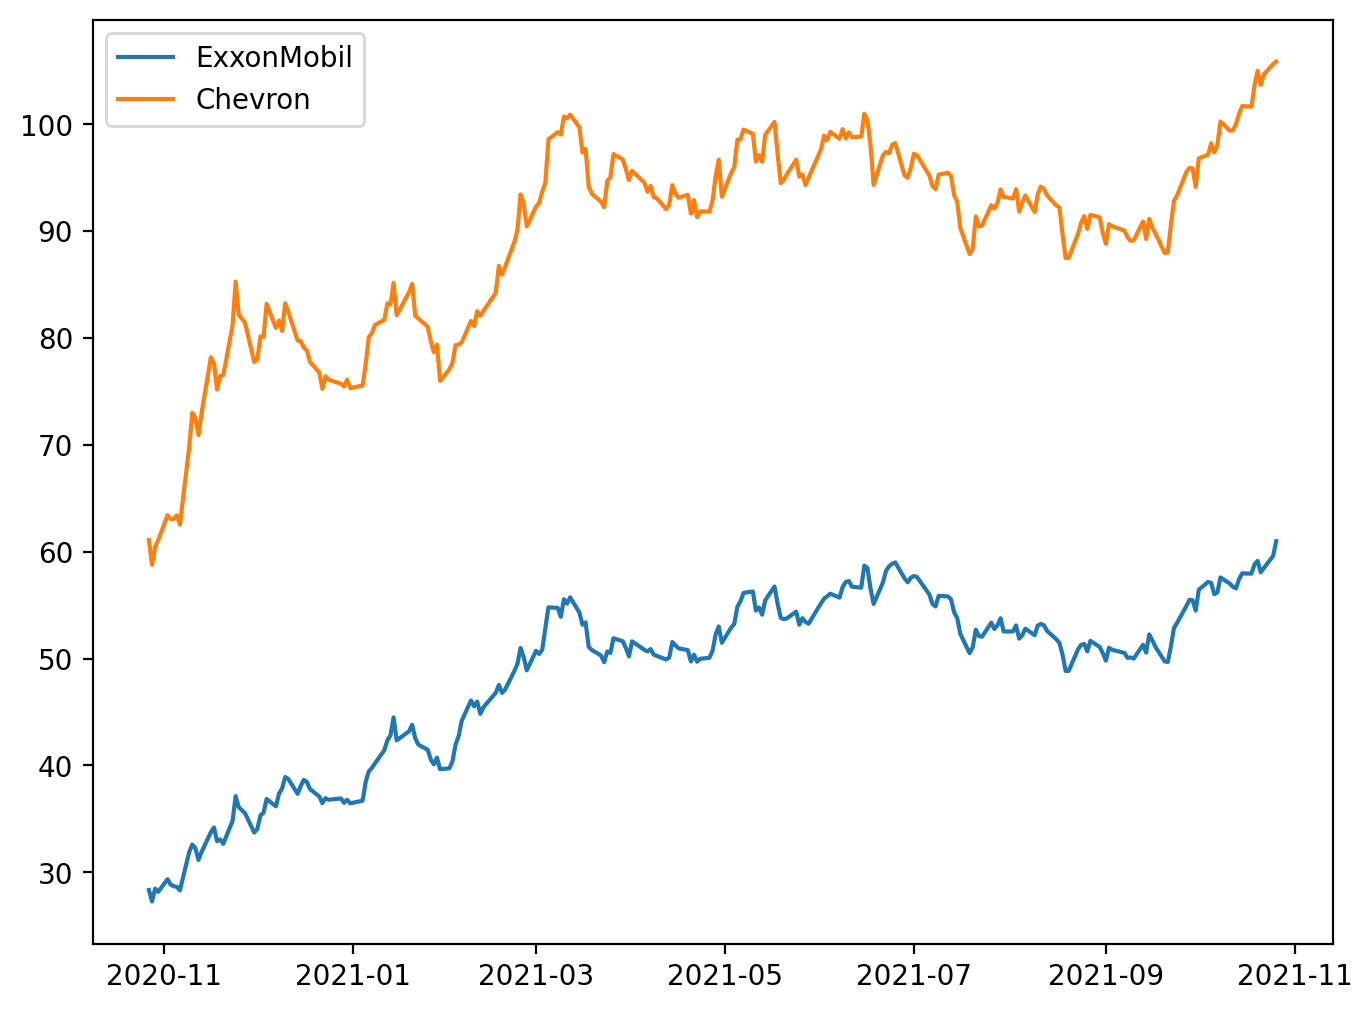

In [ ]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
XOM = d['XOM'] # S&P 500
CVX = d['CVX'] # Berkshire Class A share
# HOWEVER, let's check out the relationship between the stocks...
plt.plot(XOM, label = "ExxonMobil")
plt.plot(CVX, label = "Chevron")
plt.legend()

Text(0.5, 1.0, 'Spread between XOM and CVX')

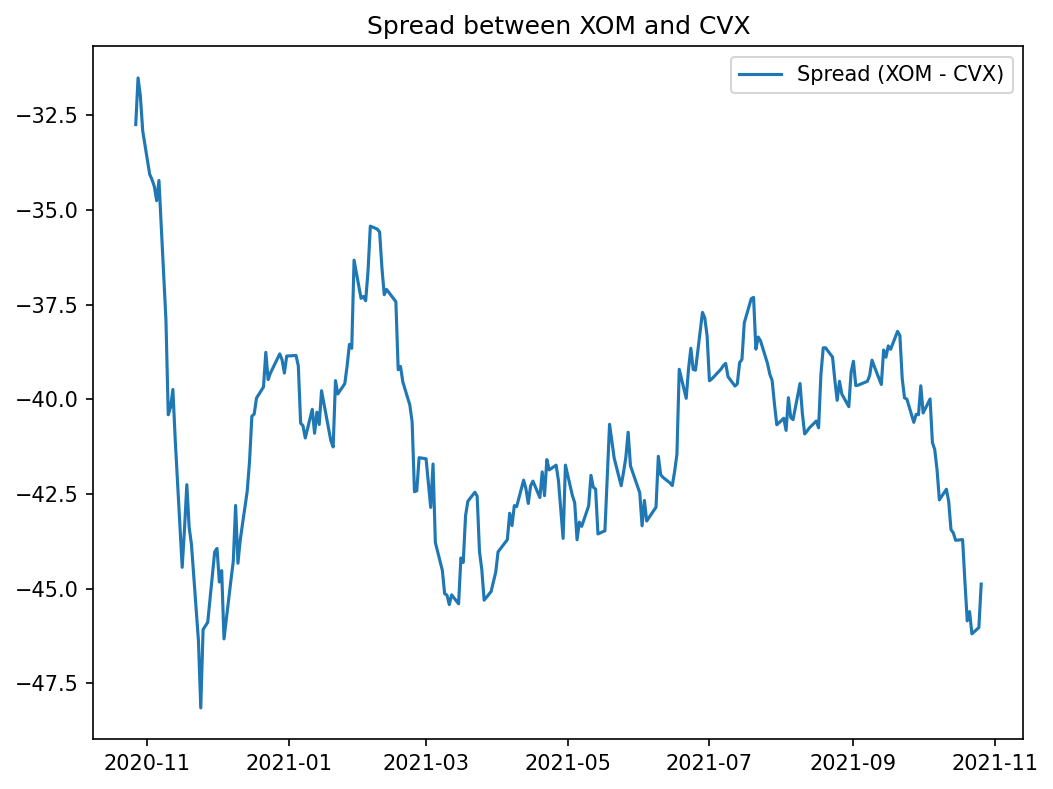

In [ ]:
figure(figsize=(8, 6), dpi=150)
plt.plot(XOM - CVX, label = 'Spread (XOM - CVX)')
plt.legend()
plt.title("Spread between XOM and CVX")

Text(0.5, 1.0, 'Price Ratio between XOM and CVX')

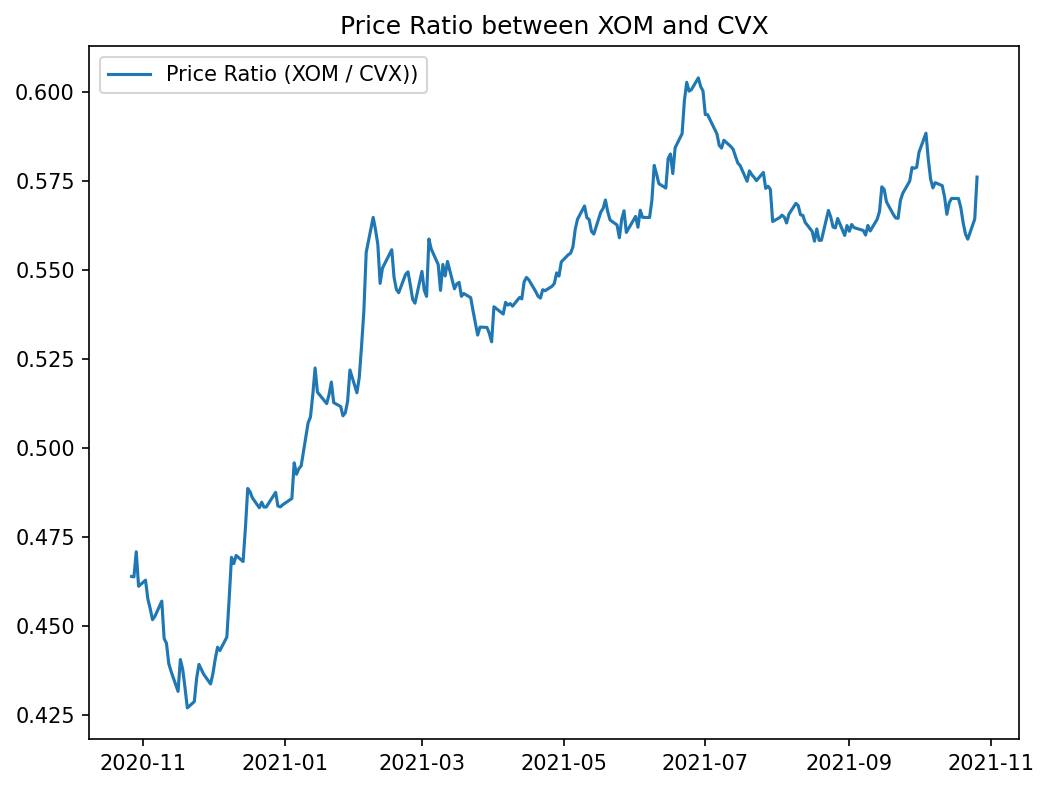

In [ ]:
figure(figsize=(8, 6), dpi=150)
ratio = XOM / CVX
plt.plot(ratio, label = 'Price Ratio (XOM / CVX))')
#plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between XOM and CVX")

In [ ]:
import statsmodels.tsa.stattools as ts
result = ts.coint(XOM, CVX)

In [ ]:
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.30966261919878124


In [ ]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
XOM_ADF = adfuller(XOM)
print('P value for the Augmented Dickey-Fuller Test is', XOM_ADF[1])
CVX_ADF = adfuller(CVX)
print('P value for the Augmented Dickey-Fuller Test is', CVX_ADF[1])
Spread_ADF = adfuller(XOM - CVX)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(XOM / CVX)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])

P value for the Augmented Dickey-Fuller Test is 0.305310888126199
P value for the Augmented Dickey-Fuller Test is 0.11453115695787158
P value for the Augmented Dickey-Fuller Test is 0.021333394407426567
P value for the Augmented Dickey-Fuller Test is 0.49728083318849287


Text(0.5, 1.0, 'Spread between XOM and CVX')

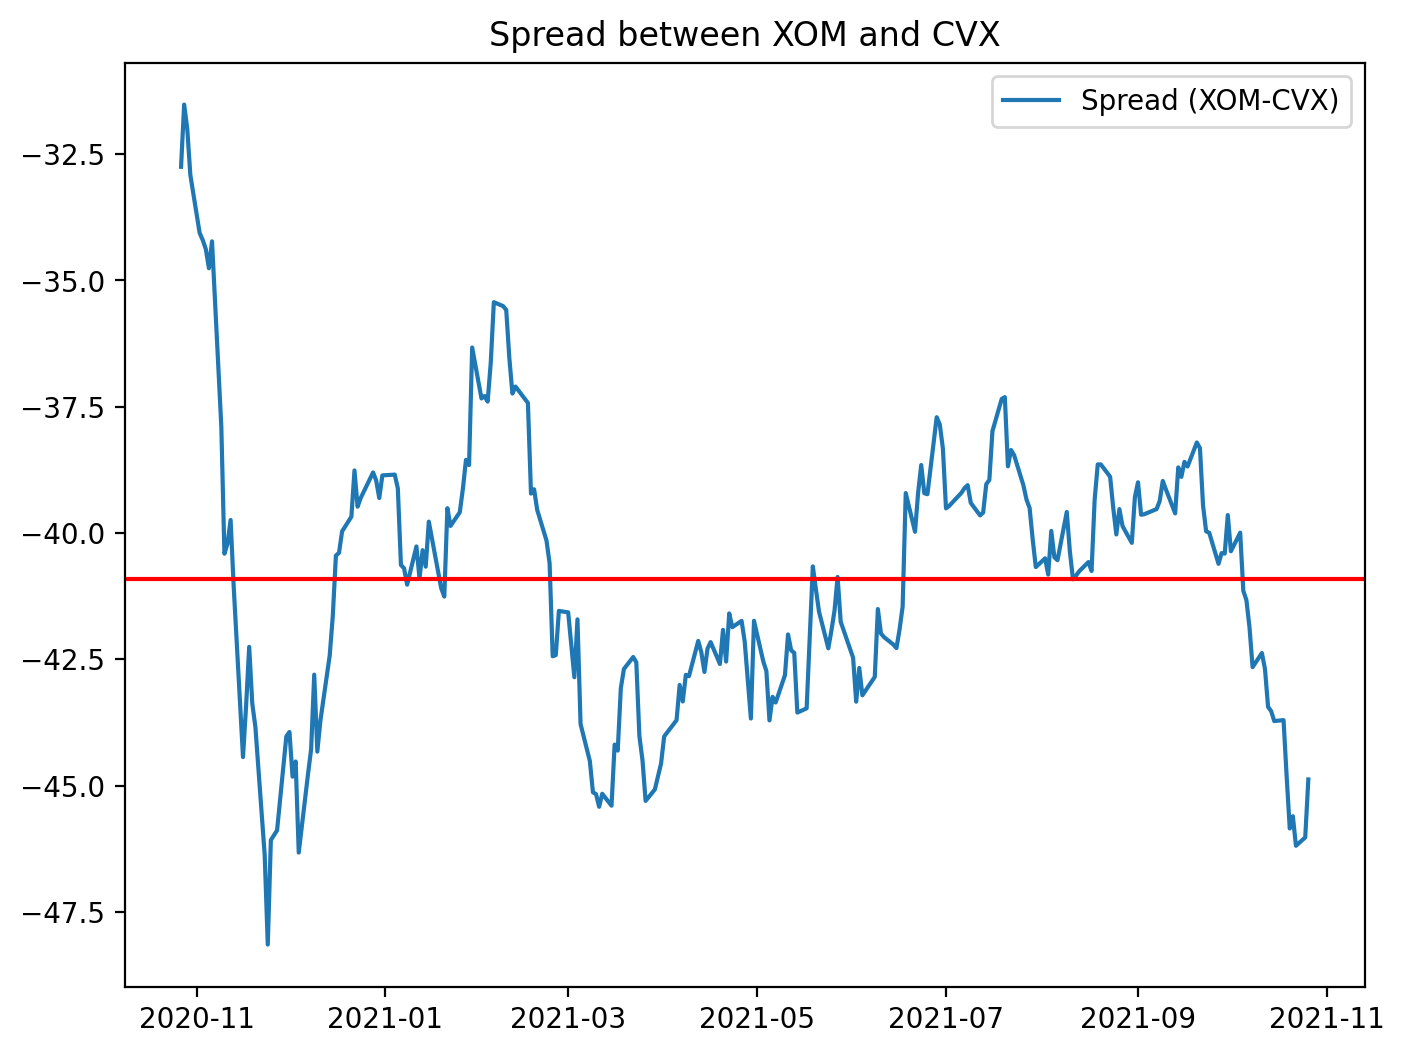

In [ ]:
figure(figsize=(8, 6), dpi=200)
spread = XOM - CVX
plt.plot(spread, label = 'Spread (XOM-CVX)')
plt.axhline(spread.mean(), color='red')
plt.legend()
plt.title("Spread between XOM and CVX")

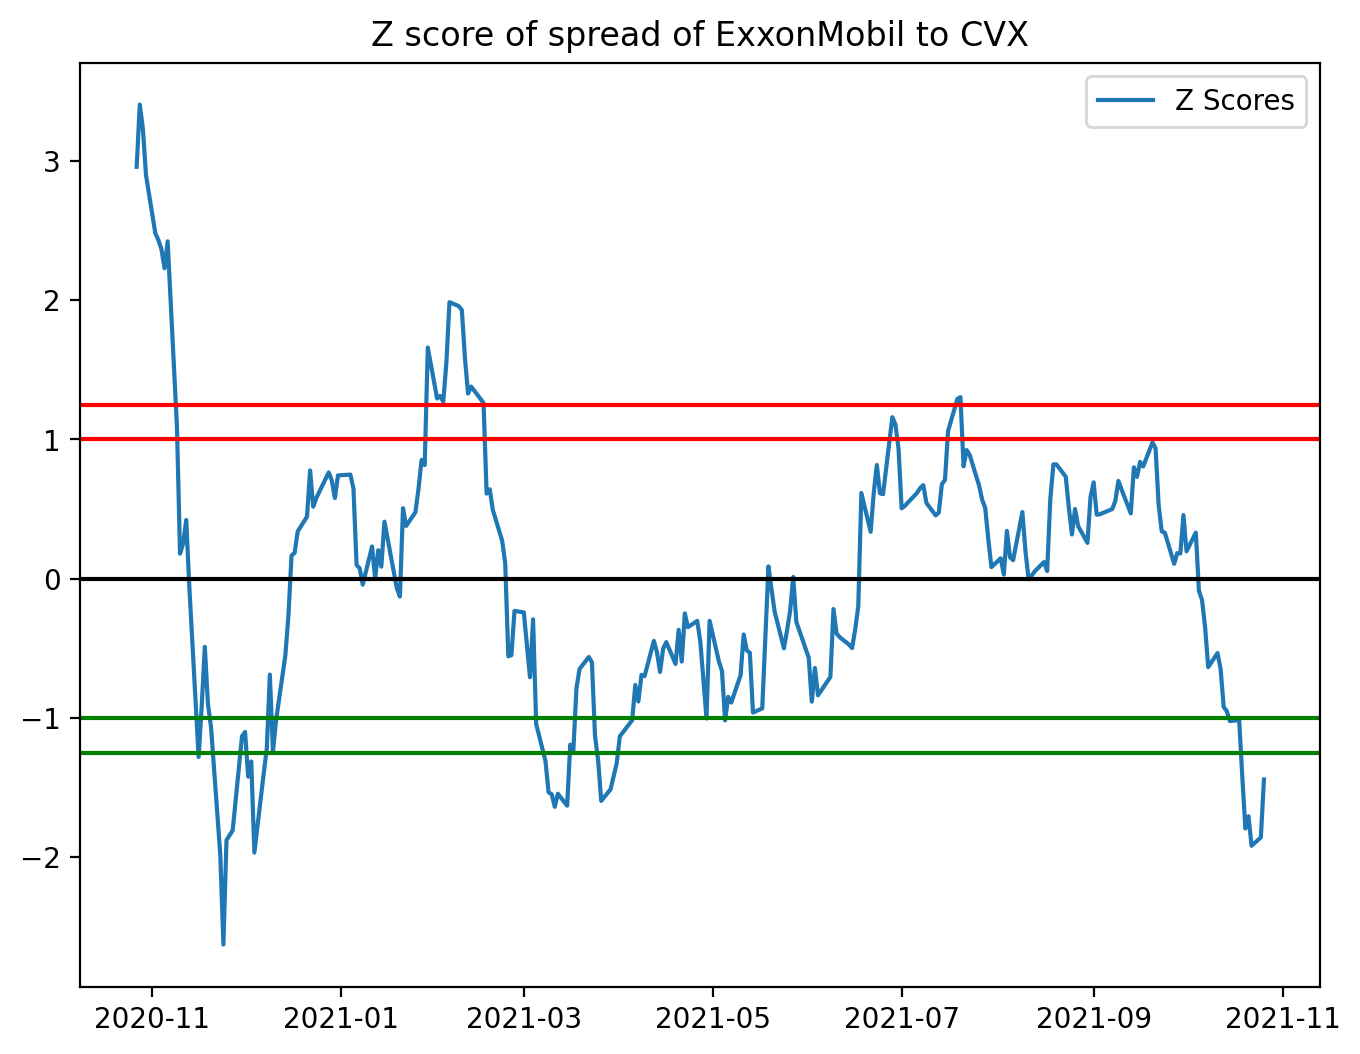

In [ ]:
 #NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (spread - spread.mean())/spread.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of spread of ExxonMobil to CVX')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can
# determine when you can go long or short the pair (BRK_B to MSFT).

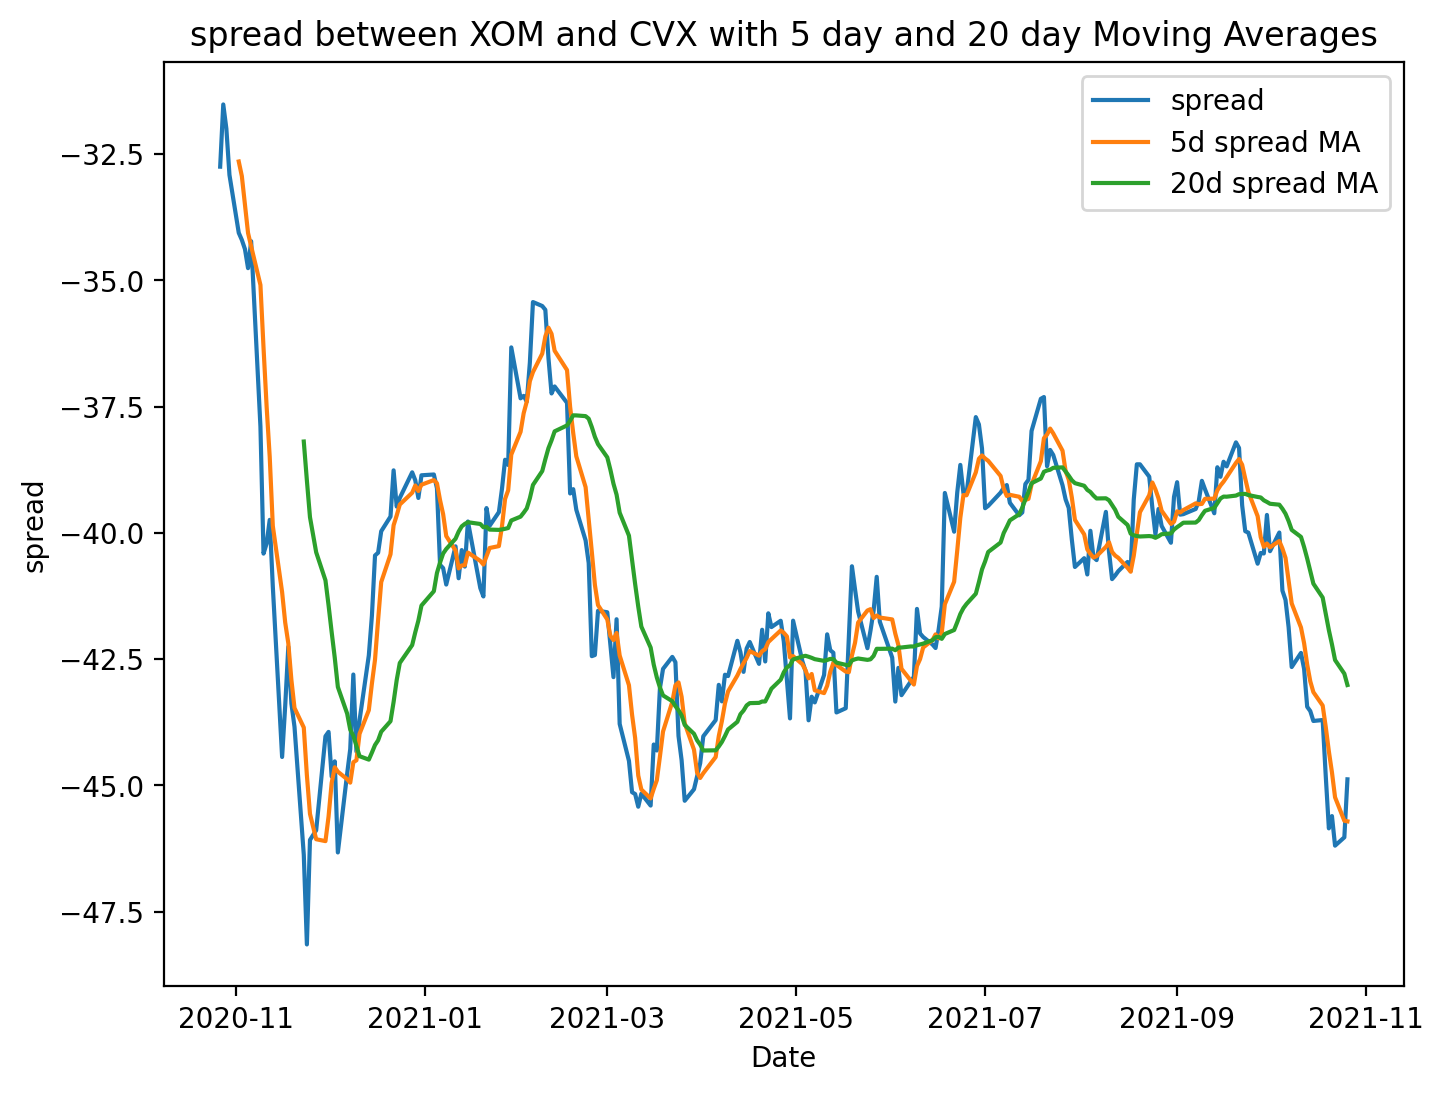

In [ ]:
figure(figsize=(8, 6), dpi=200)
spreads_mavg5 = spread.rolling(window=5, center=False).mean()
spreads_mavg20 = spread.rolling(window=20, center=False).mean()
std_20 = spread.rolling(window=20, center=False).std()
zscore_20_5 = (spreads_mavg5 - spreads_mavg20)/std_20
plt.plot(spread.index, spread.values)
plt.plot(spreads_mavg5.index, spreads_mavg5.values)
plt.plot(spreads_mavg20.index, spreads_mavg20.values)
plt.legend(['spread', '5d spread MA', '20d spread MA'])
plt.xlabel('Date')
plt.ylabel('spread')
plt.title('spread between XOM and CVX with 5 day and 20 day Moving Averages')
plt.show()

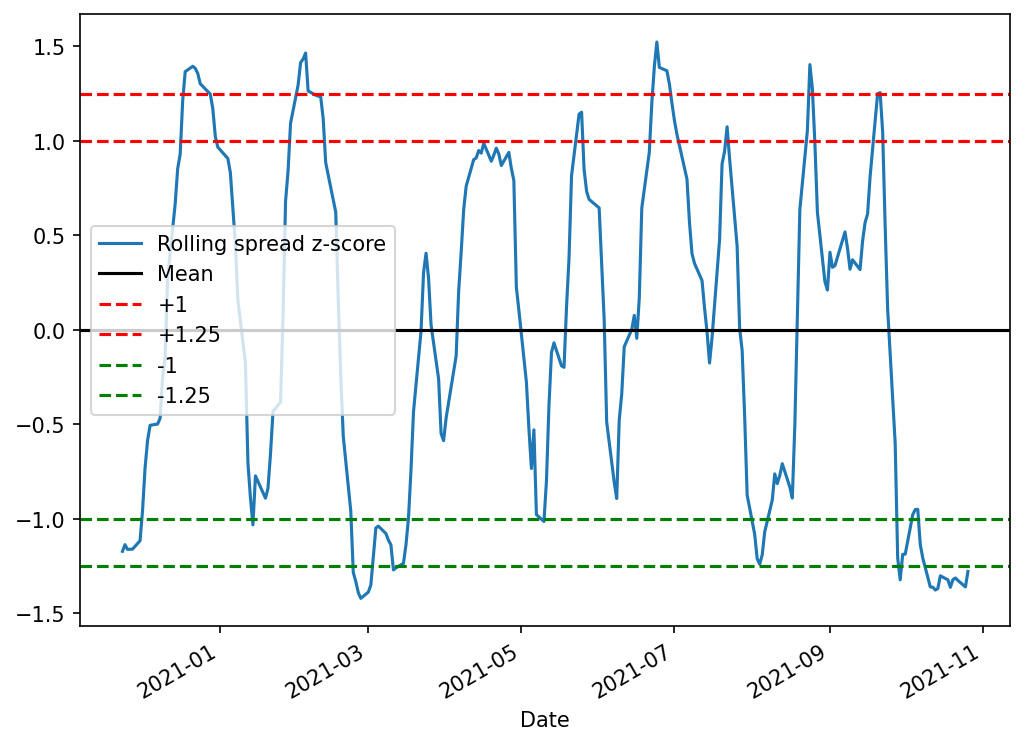

In [ ]:
figure(figsize=(8, 6), dpi=150)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling spread z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

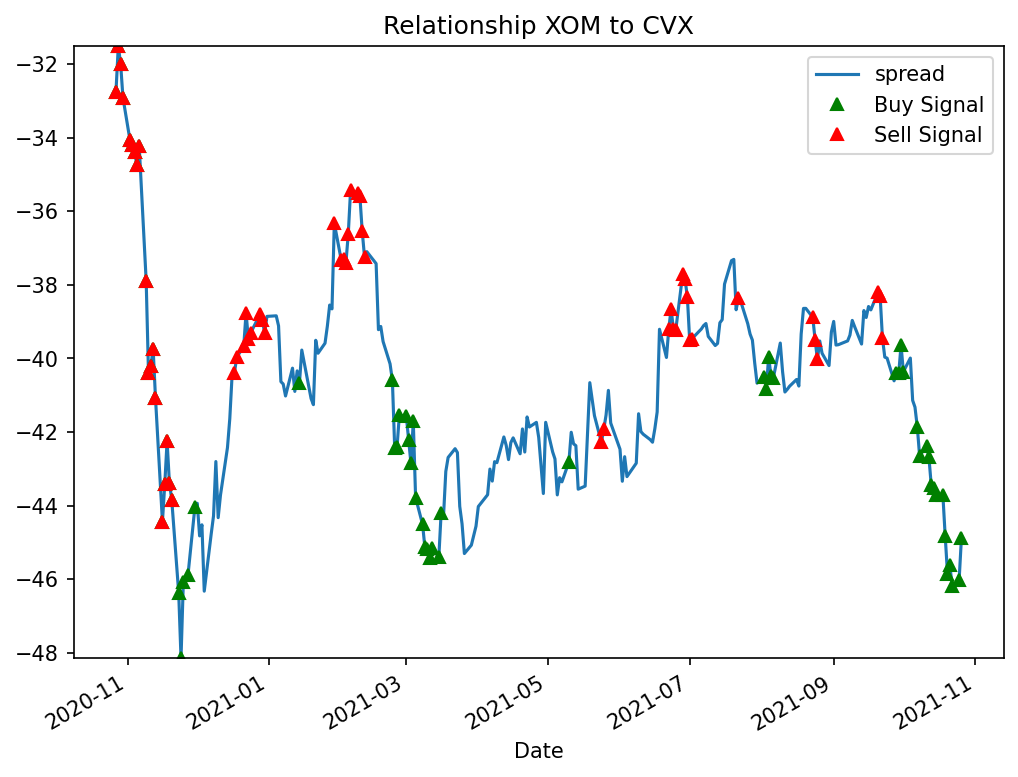

In [ ]:
figure(figsize=(8, 6), dpi=150)
spread.plot()
buy = spread.copy()
sell = spread.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, spread.min(), spread.max()))
plt.legend(['spread', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship XOM to CVX')
plt.show()